## Installing dependencies

In [23]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns

## Analysing and preprocessing the dataset

In [52]:
# reading the file into pd dataframe
dataset = pd.read_csv('parkinsons.data')

In [7]:
dataset.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [10]:
# checking for missing values
dataset.isnull().sum().sum()

0

In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [12]:
dataset.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [27]:
# getting the column names
columns = dataset.columns.to_list()

In [28]:
columns

['name',
 'MDVP:Fo(Hz)',
 'MDVP:Fhi(Hz)',
 'MDVP:Flo(Hz)',
 'MDVP:Jitter(%)',
 'MDVP:Jitter(Abs)',
 'MDVP:RAP',
 'MDVP:PPQ',
 'Jitter:DDP',
 'MDVP:Shimmer',
 'MDVP:Shimmer(dB)',
 'Shimmer:APQ3',
 'Shimmer:APQ5',
 'MDVP:APQ',
 'Shimmer:DDA',
 'NHR',
 'HNR',
 'status',
 'RPDE',
 'DFA',
 'spread1',
 'spread2',
 'D2',
 'PPE']

In [29]:
# removing columns not useful for plotting
columns = [x for x in columns if x not in ['name', 'status']]

In [30]:
columns

['MDVP:Fo(Hz)',
 'MDVP:Fhi(Hz)',
 'MDVP:Flo(Hz)',
 'MDVP:Jitter(%)',
 'MDVP:Jitter(Abs)',
 'MDVP:RAP',
 'MDVP:PPQ',
 'Jitter:DDP',
 'MDVP:Shimmer',
 'MDVP:Shimmer(dB)',
 'Shimmer:APQ3',
 'Shimmer:APQ5',
 'MDVP:APQ',
 'Shimmer:DDA',
 'NHR',
 'HNR',
 'RPDE',
 'DFA',
 'spread1',
 'spread2',
 'D2',
 'PPE']

## Visualisation

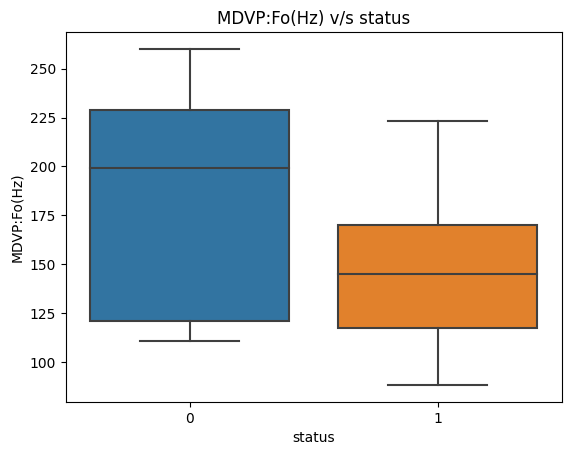

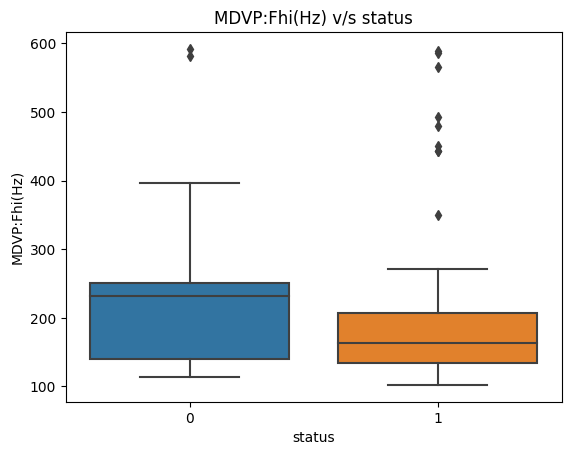

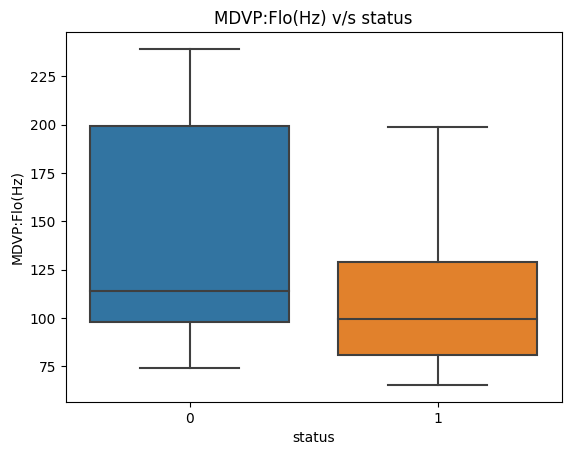

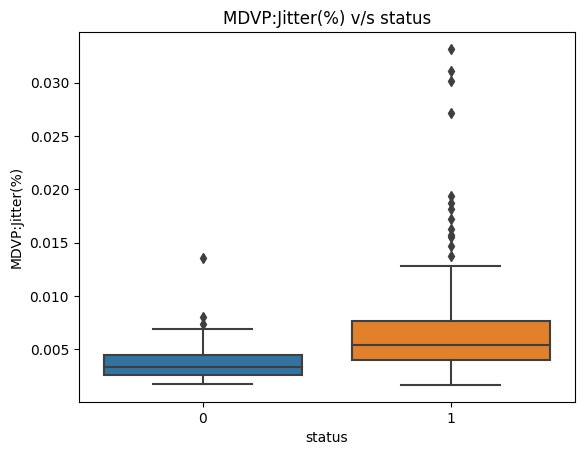

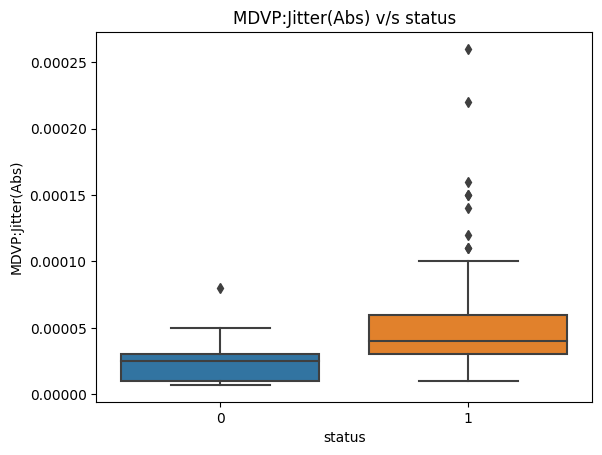

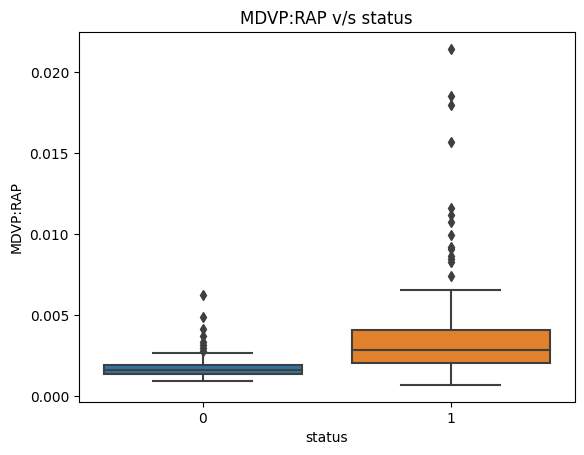

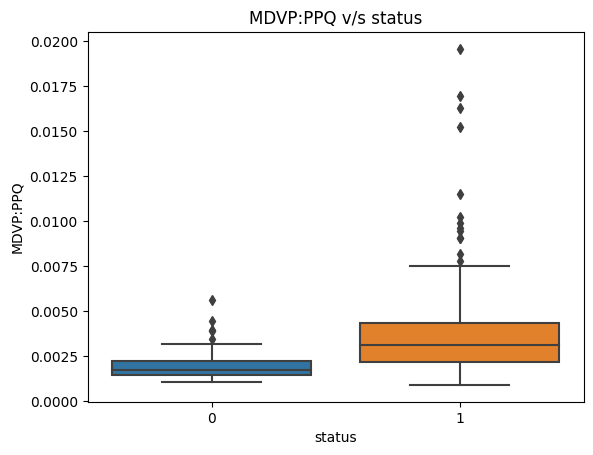

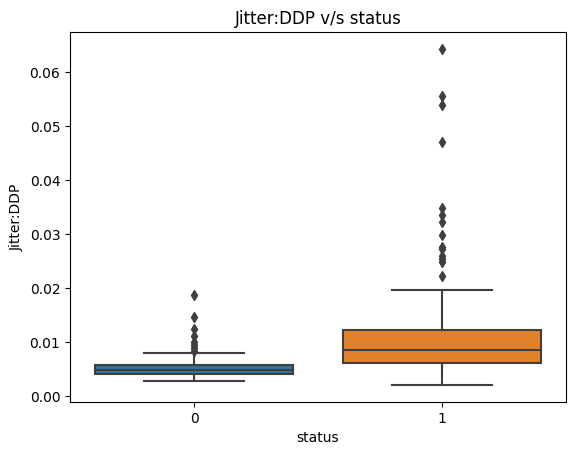

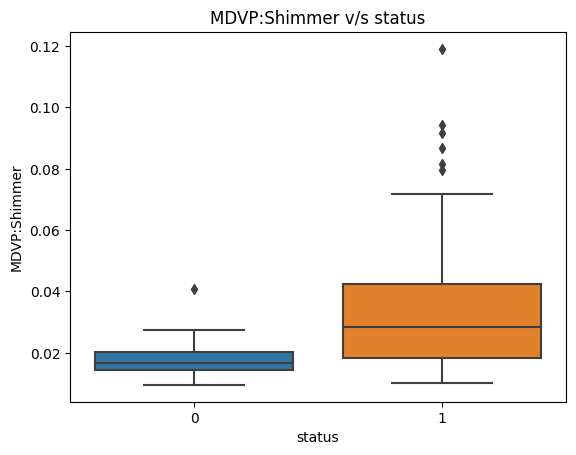

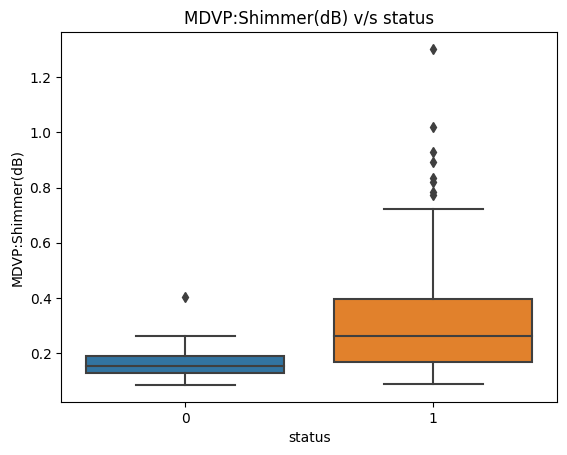

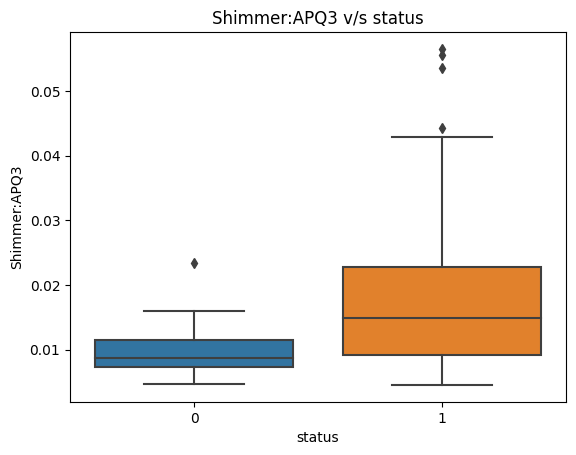

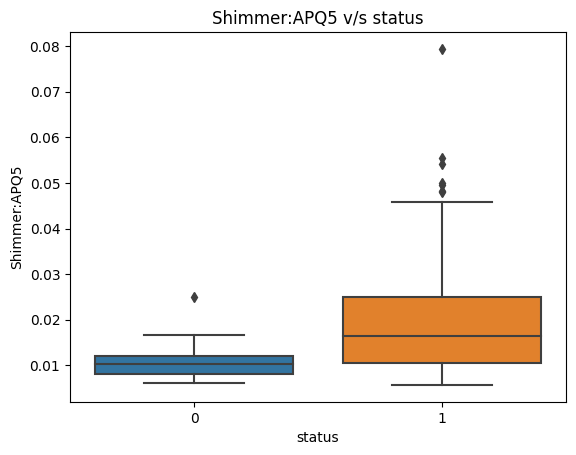

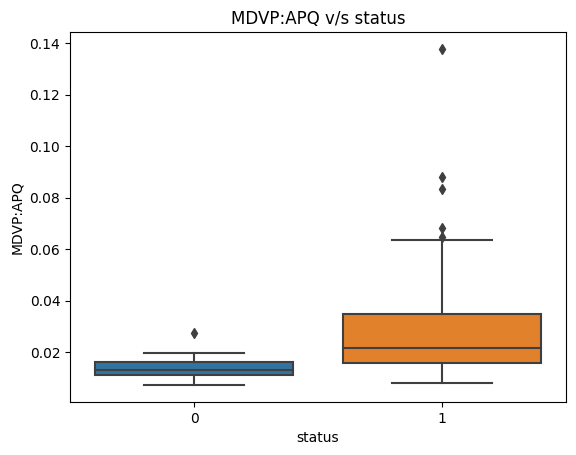

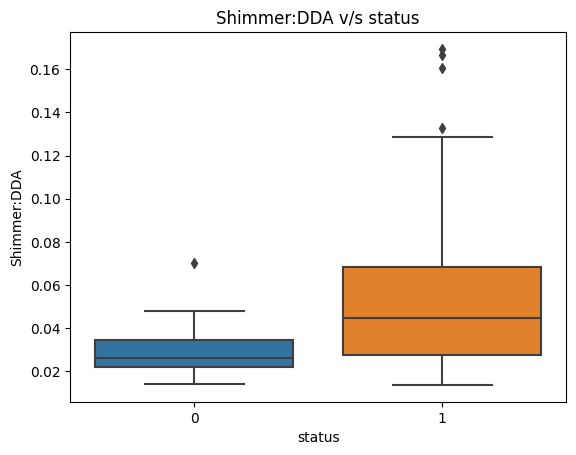

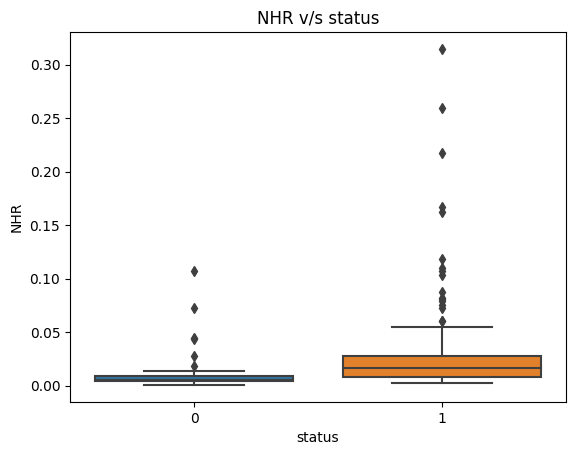

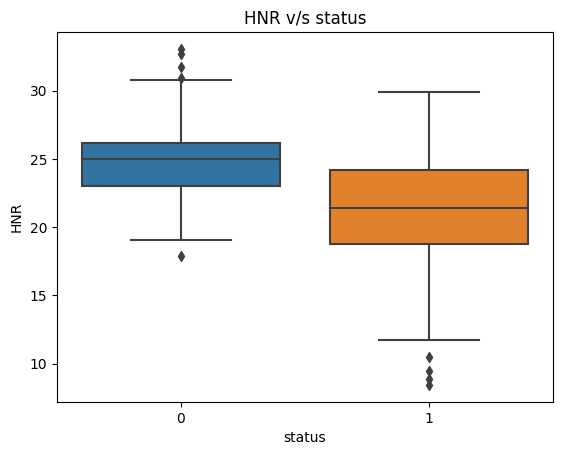

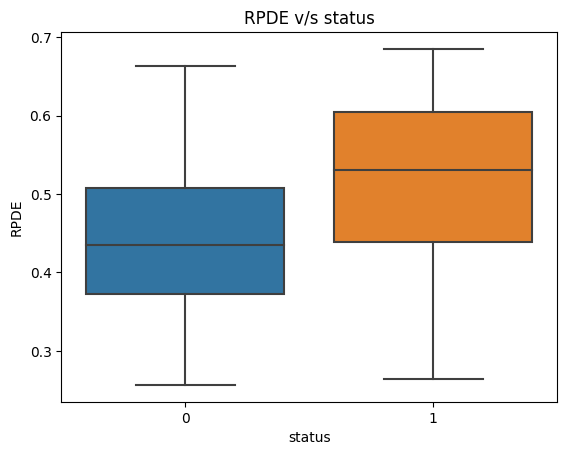

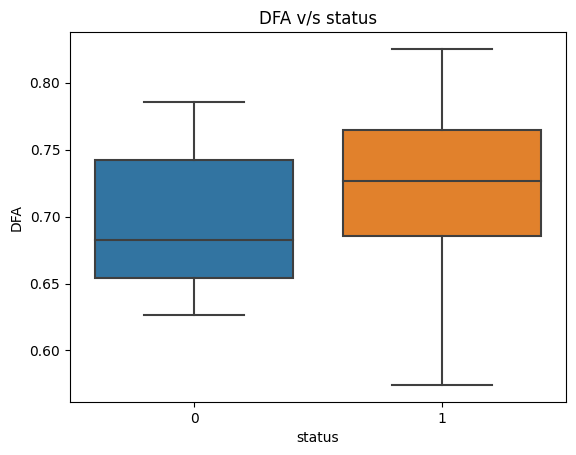

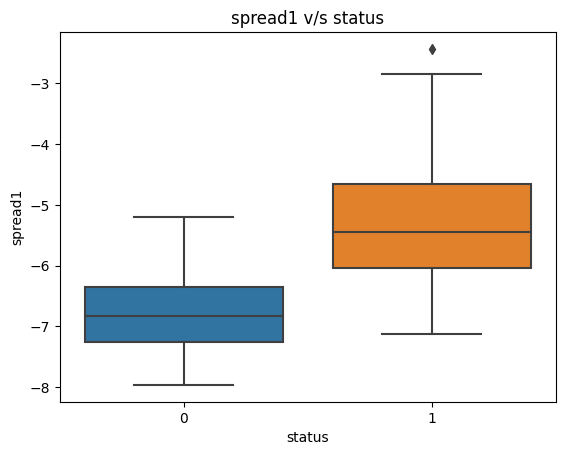

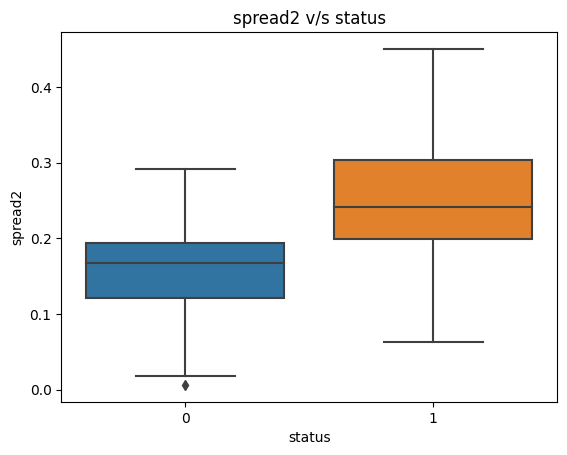

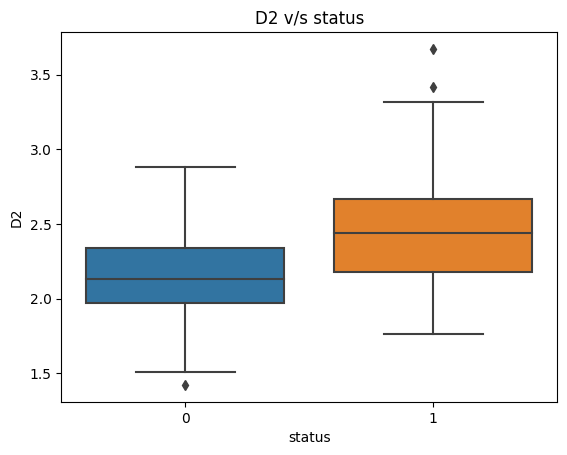

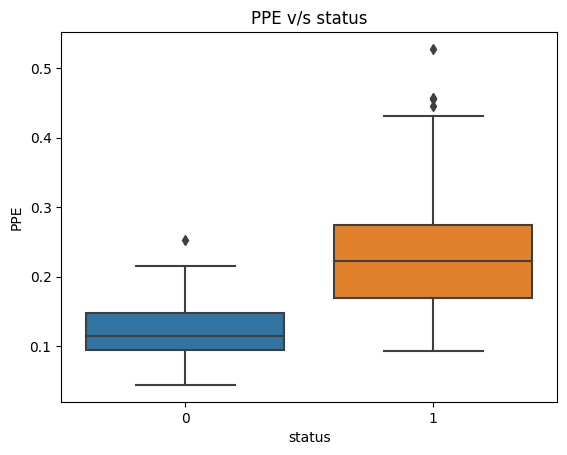

In [31]:
# plotting each feature against the status 
for column in columns:
    sns.boxplot(x=dataset['status'], y=dataset[column])
    plt.xlabel('status')
    plt.ylabel(column)
    plt.title(f'{column} v/s status')
    plt.show()

In [55]:
# ranking the features in terms of correlation values
dataset = dataset.drop(columns = 'name', axis = 1)
correlation_values = d2.corr()['status'].abs().sort_values(ascending=False)
best_features = correlation_values[1:].index.tolist()  # Exclude the target variable from the list
print(best_features)

['spread1', 'PPE', 'spread2', 'MDVP:Fo(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Shimmer', 'MDVP:APQ', 'HNR', 'Shimmer:APQ5', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:DDA', 'D2', 'MDVP:Jitter(Abs)', 'RPDE', 'MDVP:PPQ', 'MDVP:Jitter(%)', 'MDVP:RAP', 'Jitter:DDP', 'DFA', 'NHR', 'MDVP:Fhi(Hz)']


In [56]:
print(columns)

['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP', 'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'spread1', 'spread2', 'D2', 'PPE']


In [57]:
print(correlation_values[1:])

spread1             0.564838
PPE                 0.531039
spread2             0.454842
MDVP:Fo(Hz)         0.383535
MDVP:Flo(Hz)        0.380200
MDVP:Shimmer        0.367430
MDVP:APQ            0.364316
HNR                 0.361515
Shimmer:APQ5        0.351148
MDVP:Shimmer(dB)    0.350697
Shimmer:APQ3        0.347617
Shimmer:DDA         0.347608
D2                  0.340232
MDVP:Jitter(Abs)    0.338653
RPDE                0.308567
MDVP:PPQ            0.288698
MDVP:Jitter(%)      0.278220
MDVP:RAP            0.266668
Jitter:DDP          0.266646
DFA                 0.231739
NHR                 0.189429
MDVP:Fhi(Hz)        0.166136
Name: status, dtype: float64


In [59]:
# selecting top 20 best features to make a new dataset
dataset2 = dataset.drop(columns = ['NHR', 'MDVP:Fhi(Hz)'], axis = 1)

### Data Scaling

In [68]:
# checking the value counts of status column
dataset['status'].value_counts()

status
1    147
0     48
Name: count, dtype: int64

### 0 => healthy

### 1 => parkinson affected

In [60]:
scaler = MinMaxScaler()
X = dataset.drop(columns = 'status', axis = 1)
Y = dataset['status']

In [69]:
X = scaler.fit_transform(X)

In [71]:
# splitting dataset into test and train
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X, Y, test_size = 0.2, stratify = Y, random_state = 2)

In [72]:
print(X_train1.shape, X_test1.shape, Y_train1.shape, Y_test1.shape)

(156, 22) (39, 22) (156,) (39,)


## Training and evaluating different models

### 1. Logistic Regression

In [73]:
lr_model = LogisticRegression()
lr_model.fit(X_train1, Y_train1)

LogisticRegression()

In [74]:
# accuracy on training data
X_train_pred1 = lr_model.predict(X_train1)
train_data_accuracy = accuracy_score(X_train_pred1, Y_train1)
print("The accuracy on training data is : ", train_data_accuracy)

The accuracy on training data is :  0.8397435897435898


In [75]:
# accuracy on test data
X_test_pred1 = lr_model.predict(X_test1)
test_data_accuracy = accuracy_score(X_test_pred1, Y_test1)
print("The accuracy on test data is : ", test_data_accuracy)

The accuracy on test data is :  0.8461538461538461


### 2. Support Vector Classifier

In [79]:
from sklearn.model_selection import GridSearchCV
# Defining the hyperparameter grid for Grid Search
param_grid = {
    'C': [0.1, 1, 10, 100],       # Regularization parameter
    'kernel': ['linear', 'rbf'],  # Kernel type: linear or radial basis function (rbf)
    'gamma': ['scale', 'auto'],   # Kernel coefficient (gamma) options
}
svc_model = SVC()
# Creating the Grid Search Cross-Validation object
grid_search_cv = GridSearchCV(svc_model, param_grid, cv=5, n_jobs=-1)
# Fitting the Grid Search CV on the training data
grid_search_cv.fit(X_train1, Y_train1)
# Getting the best hyperparameters found during Grid Search
best_params = grid_search_cv.best_params_
print("Best Hyperparameters:", best_params)
# Getting the best SVC model with the best hyperparameters
best_svc_model = grid_search_cv.best_estimator_

Best Hyperparameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}


In [80]:
# accuracy on training data
X_train_pred2 = best_svc_model.predict(X_train1)
train_data_accuracy = accuracy_score(X_train_pred2, Y_train1)
print("The accuracy on training data is : ", train_data_accuracy)

The accuracy on training data is :  0.9615384615384616


In [81]:
# accuracy on test data
X_test_pred2 = best_svc_model.predict(X_test1)
test_data_accuracy = accuracy_score(X_test_pred2, Y_test1)
print("The accuracy on test data is : ", test_data_accuracy)

The accuracy on test data is :  0.9487179487179487


### 3. Random Forest Classifier

In [91]:
rfc_model = RandomForestClassifier()
rfc_model.fit(X_train1, Y_train1)

RandomForestClassifier()

In [92]:
# accuracy on training data
X_train_pred3 = rfc_model.predict(X_train1)
train_data_accuracy = accuracy_score(X_train_pred3, Y_train1)
print("The accuracy on training data is : ", train_data_accuracy)

The accuracy on training data is :  1.0


In [93]:
# accuracy on test data
X_test_pred3 = rfc_model.predict(X_test1)
test_data_accuracy = accuracy_score(X_test_pred3, Y_test1)
print("The accuracy on test data is : ", test_data_accuracy)

The accuracy on test data is :  0.9487179487179487


In [94]:
print(classification_report(Y_test1, X_test_pred3))

              precision    recall  f1-score   support

           0       1.00      0.80      0.89        10
           1       0.94      1.00      0.97        29

    accuracy                           0.95        39
   macro avg       0.97      0.90      0.93        39
weighted avg       0.95      0.95      0.95        39



In [95]:
param_grid = {
    'n_estimators': [100],      # Number of trees in the forest
    'max_depth': [None, 5, 10],      # Maximum depth of the trees (None means no limit)
    'min_samples_split': [2, 5],      # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]         # Minimum number of samples required to be at a leaf node
}
# Create the Random Forest Classifier
rf_classifier = RandomForestClassifier()
# Create the Grid Search Cross-Validation object
grid_search_cv = GridSearchCV(rf_classifier, param_grid, cv=5, n_jobs=-1)
# Fit the Grid Search CV on the training data
grid_search_cv.fit(X_train1, Y_train1)
# Get the best hyperparameters found during Grid Search
best_params = grid_search_cv.best_params_
print("Best Hyperparameters:", best_params)
# Get the best Random Forest Classifier with the best hyperparameters
best_rf_classifier = grid_search_cv.best_estimator_

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [96]:
# accuracy on training data
X_train_pred3 = best_rf_classifier.predict(X_train1)
train_data_accuracy = accuracy_score(X_train_pred3, Y_train1)
print("The accuracy on training data is : ", train_data_accuracy)

The accuracy on training data is :  1.0


In [98]:
# accuracy on test data
X_test_pred3 = best_rf_classifier.predict(X_test1)
test_data_accuracy = accuracy_score(X_test_pred3, Y_test1)
print("The accuracy on test data is : ", test_data_accuracy)

The accuracy on test data is :  0.9743589743589743


In [145]:
print(classification_report(Y_test1, X_test_pred3))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       0.97      1.00      0.98        29

    accuracy                           0.97        39
   macro avg       0.98      0.95      0.97        39
weighted avg       0.98      0.97      0.97        39



### 4. XGBoost

In [141]:
xgb_model = XGBClassifier(n_estimators = 10, random_state = 2)
xgb_model.fit(X_train1, Y_train1)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=10, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=2, ...)

In [142]:
# accuracy on training data
X_train_pred4 = xgb_model.predict(X_train1)
train_data_accuracy = accuracy_score(X_train_pred4, Y_train1)
print("The accuracy on training data is : ", train_data_accuracy)

The accuracy on training data is :  1.0


In [143]:
# accuracy on test data
X_test_pred4 = xgb_model.predict(X_test1)
test_data_accuracy = accuracy_score(X_test_pred4, Y_test1)
print("The accuracy on test data is : ", test_data_accuracy)

The accuracy on test data is :  0.9743589743589743


In [146]:
print(classification_report(Y_test1, X_test_pred4))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       0.97      1.00      0.98        29

    accuracy                           0.97        39
   macro avg       0.98      0.95      0.97        39
weighted avg       0.98      0.97      0.97        39



We can conclude that xgboost classifier model is working well amongst all the models(with less computation cost)

### Using the model on the dataset obtained after selecting best features

In [151]:
X2 = dataset2.drop(columns = 'status', axis = 1)
Y2 = dataset2['status']

In [152]:
X2 = scaler.fit_transform(X2)

In [153]:
# splitting dataset into test and train
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X2, Y2, test_size = 0.2, stratify = Y2, random_state = 2)

In [154]:
print(X_train2.shape, X_test2.shape, Y_train2.shape, Y_test2.shape)

(156, 20) (39, 20) (156,) (39,)


In [155]:
xgb_model2 = XGBClassifier(n_estimators = 10, random_state = 2)
xgb_model2.fit(X_train2, Y_train2)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=10, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=2, ...)

In [156]:
# accuracy on training data
X_train_pred5 = xgb_model2.predict(X_train2)
train_data_accuracy = accuracy_score(X_train_pred5, Y_train2)
print("The accuracy on training data is : ", train_data_accuracy)

The accuracy on training data is :  1.0


In [157]:
# accuracy on test data
X_test_pred5 = xgb_model2.predict(X_test2)
test_data_accuracy = accuracy_score(X_test_pred5, Y_test2)
print("The accuracy on test data is : ", test_data_accuracy)

The accuracy on test data is :  0.9487179487179487


In [158]:
print(classification_report(Y_test2, X_test_pred5))

              precision    recall  f1-score   support

           0       1.00      0.80      0.89        10
           1       0.94      1.00      0.97        29

    accuracy                           0.95        39
   macro avg       0.97      0.90      0.93        39
weighted avg       0.95      0.95      0.95        39



So we can conclude that including all the features is better

## Saving the best model

In [159]:
import pickle as pkl
pkl.dump(xgb_model, open('parkinsons_model.pkl', 'wb'))